import pandas as pd
from tensorflow import keras
import tensorflow as tf

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow.keras.utils as utils

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D

In [29]:
data_path = (r'C:\Users\SAMRIDHI SAHU\code\PastWork\code\Facial-Emotion-Recognition-main\data\ckplus\CK+48')

In [30]:
import os
from os import path, environ

In [31]:
data_dir_list = os.listdir(data_path)
#data_dir_list
print(str(len(data_dir_list))+' classes are',data_dir_list)

7 classes are ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [32]:
import cv2

In [33]:
img_data = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)
        
        img = cv2.resize(img,(48,48))
        
        img_data.append(img)
        

number of images in anger =  135
number of images in contempt =  54
number of images in disgust =  177
number of images in fear =  75
number of images in happy =  207
number of images in sadness =  84
number of images in surprise =  249


In [34]:
import numpy as np

In [35]:
img_data = np.array(img_data)
img_data[0].shape

(48, 48, 3)

In [36]:
img_data.shape

(981, 48, 48, 3)

In [37]:
# Normalization (essential for neural nets)
img_data = img_data.astype('float32')
img_data = img_data/255

In [38]:
img_data.shape

(981, 48, 48, 3)

In [39]:
print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

shape of image (48, 48)
num of images  981


In [40]:
label_text = {0:'anger', 1:'contempt', 2: 'contempt',
                         3:'fear', 4:'happiness',
                         5: 'sadness', 6: 'surprise'}

In [41]:
labels = np.ones((img_data.shape[0],),dtype='int64')

In [42]:
labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177

labels[366:440]=3 #75
labels[441:647]=4 #207

labels[648:731]=5 #84
labels[732:980]=6 #249

In [43]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
#     axes = axes.flatten()
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()

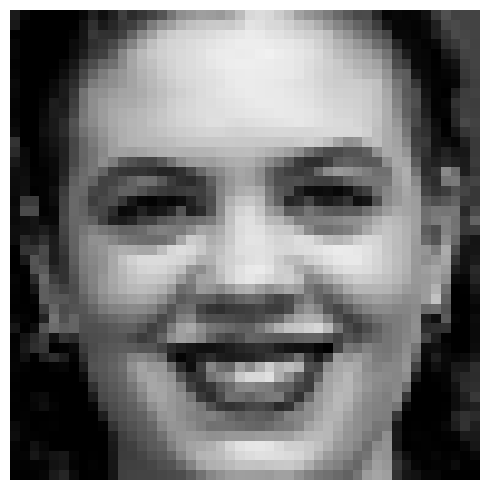

happiness


In [44]:
plotImages(img_data[600])
print(label_text[labels[600]])

In [45]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    return model

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score

In [47]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearrest')

In [48]:
from tensorflow.keras.optimizers import *

In [53]:
x,Y = shuffle(img_data, Y, random_state = 3)

NameError: name 'Y' is not defined

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

NameError: name 'x' is not defined

In [55]:
Y = utils.to_categorical(labels, len(dataset)-1)
print(len(Y))
Y

981


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
len(img_data)

981

In [57]:
plotImages(x[0])
print(y[0])

NameError: name 'x' is not defined

In [58]:
aug.fit(X_train)

NameError: name 'X_train' is not defined

In [59]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [60]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(0.001),
]


model = create_model(optims[1]) 




In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9

In [62]:
model.fit(x=X_train, y= y_train, validation_split=0.1, batch_size=32, 
          epochs=100, shuffle=True, verbose=2, callbacks=callbacks 
         )

NameError: name 'X_train' is not defined

In [63]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [64]:
import seaborn as sns
import pandas as pd

In [65]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [66]:
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

NameError: name 'cm' is not defined

In [67]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

NameError: name 'cm' is not defined

<Figure size 500x500 with 0 Axes>

In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [69]:
from sklearn.metrics import multilabel_confusion_matrix

In [70]:
y_pred = (y_pred>0.5)
multilabel_confusion_matrix(y_test, y_pred )

NameError: name 'y_pred' is not defined

In [71]:
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))

number of images in anger =  135
number of images in contempt =  54
number of images in disgust =  177
number of images in fear =  75
number of images in happy =  207
number of images in sadness =  84
number of images in surprise =  249


In [72]:
plotImages(X_test[3])
ans = int(model.predict_classes(test_image)[0])
print(label_text[ans])

NameError: name 'X_test' is not defined

In [73]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

In [74]:
test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])

NameError: name 'X_test' is not defined

In [75]:
model.predict_classes(test_img)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [76]:
y_test[1:2]

NameError: name 'y_test' is not defined

In [77]:
xx = []
xx

[]

In [78]:
import imageio

ModuleNotFoundError: No module named 'imageio'

In [79]:
pic = imageio.imread('ex7.jpeg')

NameError: name 'imageio' is not defined

In [80]:
pic.shape

NameError: name 'pic' is not defined

In [81]:
pic = cv2.resize(pic,(48,48))

NameError: name 'pic' is not defined

In [82]:
xx.append(pic)

NameError: name 'pic' is not defined

In [83]:
xx = np.array(xx)
xx = xx.astype('float32')
xx = xx/255

In [84]:
xx.shape

(0,)

In [85]:
model.predict_classes(xx)[0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [86]:
plotImages(pic)

NameError: name 'pic' is not defined

In [87]:
data_dir_list

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [89]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PyQt5.QtWidgets import QFileDialog
from datetime import datetime
import seaborn as sns
import easygui


df = pd.DataFrame(columns=['time', 'emotion'])

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
model= load_model('model.h5')
emotion_dict = {0: 'anger', 1: 'contempt', 2: 'disgust',
                3: 'fear', 4: 'happiness',
                5: 'sadness', 6: 'surprise'}

j = 0

print('\n Select your choice: ')
print('\n 1) Capture live feed using webcam')
print('\n 2) Select a video file ')
print('\n 3) Select a image file ')
print('\n Enter Your Choice :')

choice = int(input('Choice: \n'))

if choice == 1:
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

elif choice == 2:
    path = easygui.fileopenbox(default='*')
    cap = cv2.VideoCapture(path)

elif choice == 3:
    j = 1
    pass

else:
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)


def convert_image(image):
    image_arr = []
    pic = cv2.resize(image, (48, 48))
    image_arr.append(pic)
    image_arr = np.array(image_arr)
    image_arr = image_arr.astype('float32')
    image_arr /= 255
    ans = model.predict_classes(image_arr)[0]
    return ans


if j == 0:
    while cap.isOpened():
        time_rec = datetime.now()

        ret, frame = cap.read()
        if ret:

            gray = cv2.flip(frame, 1)

            faces = face_cascade.detectMultiScale(gray, 1.1, 4)

            for (x, y, w, h) in faces:
                cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)
                roi_gray = gray[y:y + h, x:x + w]


                prediction = int(convert_image(roi_gray))

                emotion = emotion_dict[prediction]

                df = df.append({'time': time_rec, 'emotion': emotion}, ignore_index=True)

                cv2.putText(gray, emotion, (x + 20, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255),
                            2  , cv2.LINE_AA
                            )

            cv2.namedWindow('Video', cv2.WINDOW_KEEPRATIO)
            cv2.imshow('Video', gray)
            cv2.resizeWindow('Video', 1000, 600)

            if cv2.waitKey(1) == 27:  # press ESC to break
                cap.release()
                cv2.destroyAllWindows()
                break

        else:
            break

else:


    path = easygui.fileopenbox(default='*')
    gray = cv2.imread(path)
    time_rec = datetime.now()
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        prediction = int(convert_image(roi_gray))

        emotion = emotion_dict[prediction]

        df = df.append({'time': time_rec, 'emotion': emotion}, ignore_index=True)

        cv2.putText(gray, emotion, (x + 20, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255),
                    2 , cv2.LINE_AA
                    )

        cv2.namedWindow('Video', cv2.WINDOW_KEEPRATIO)
        cv2.imshow('Video', gray)
        cv2.resizeWindow('Video', 1000, 600)

        if cv2.waitKey(1) == 27:  # press ESC to break
            break

        else:
            break



print(df.head())
print(df.shape)

import matplotlib.pyplot as plt

emo_data = df.groupby('emotion').size()
print(emo_data, '\n')

emotion_dict_count = {'anger': 0, 'contempt': 0, 'disgust': 0,
                      'fear': 0, 'happiness': 0,
                      'sadness': 0, 'surprise': 0}

for i in df['emotion']:
    emotion_dict_count[str(i)] += 1

emo_count = [x for x in emotion_dict_count.values()]
emo_name = [x for x in emotion_dict_count.keys()]


for i,j in zip(emo_count, emo_name):
    if i == 0:
        emo_count.remove(i)
        emo_name.remove(j)



plt.pie(x=emo_count, labels=emo_name, autopct='%1.2f', startangle=90)

# print('\n emo_count :',emo_count)
# print('\n emo_name :',emo_name)


plt.title("Emotions Recorded ")

plt.show()



 Select your choice: 

 1) Capture live feed using webcam

 2) Select a video file 

 3) Select a image file 

 Enter Your Choice :
Choice: 
1
Empty DataFrame
Columns: [time, emotion]
Index: []
(0, 2)
Series([], dtype: int64) 



C:\Users\SAMRIDHI SAHU\opencv\lib\site-packages\matplotlib\axes\_axes.py:3154: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>